# Adding a synchronization channel to a .wav file

## Imports

In [24]:
import thebeat

In [11]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Create sequences
### Stimulus sequence

We will first create a random stimulus and plot it:

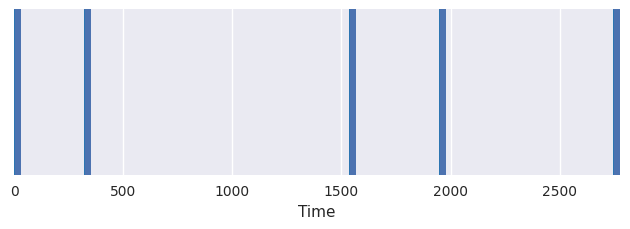

In [30]:
# Create a random Sequence
stim_sequence = thebeat.Sequence(iois=[321, 1213, 411, 800])
stim_sequence.plot_sequence();

### Synchronization sequence

Let's say we need a synchronization sequence of 2 Hz, i.e. an inter-onset interval (IOI) of 500 ms. We probably want the duration of the stimulus plus one extra synchronization pulse:

In [41]:
stim_duration = stim_sequence.duration
n_pulses = stim_duration // 500 + 2
print(n_pulses)

7.0


In the example above we use the floor division operator to round the division down, and then we add two (one extra, plus one to account for the difference between the number of IOIs and the number of events.

---

Now, we can create the pacing stimulus sequence:

In [39]:
sync_sequence = thebeat.Sequence.generate_isochronous(n_events=7,
                                                      ioi=500)

Plotted together they now look like this:

(<Figure size 800x550 with 1 Axes>, <Axes: xlabel='Time'>)

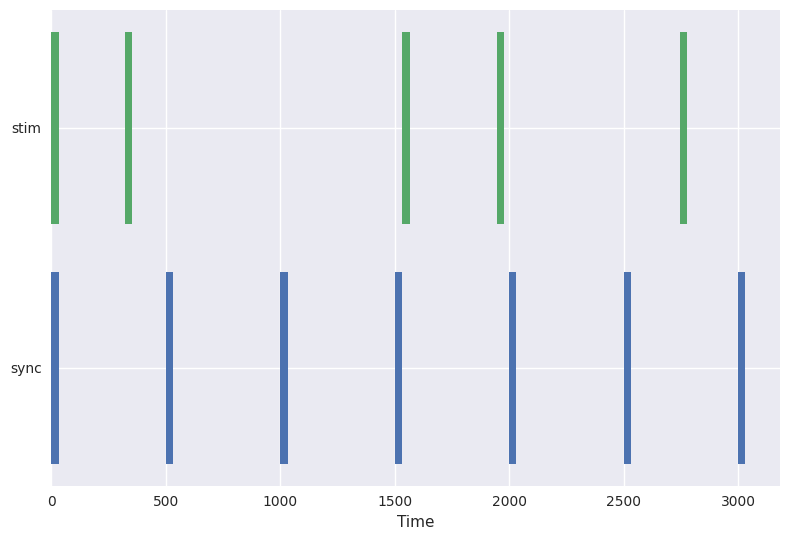

In [40]:
thebeat.visualization.plot_multiple_sequences([stim_sequence, sync_sequence],
                                             y_axis_labels=['stim', 'sync'])

## Synthesize sound

Below, we create a stereo sound for the stimulus, and a mono sound for the synchronization channel (three channels in total).

In [47]:
stim_sound = thebeat.SoundStimulus.generate(freq=440, n_channels='stereo')
sync_sound = thebeat.SoundStimulus.generate(freq=200, n_channels='mono')

## Combine into SoundSequences

In [48]:
stim_ss = thebeat.SoundSequence(stim_sound, stim_sequence)
sync_ss = thebeat.SoundSequence(sync_sound, sync_sequence)

## Write multi-channel wav
Now, we can write a multichannel wav to disk:

In [50]:
thebeat.SoundSequence.write_multichannel_wav([stim_ss, sync_ss], 'multichannel.wav')